
# Proyecto de Ciencia de Datos - Parte I
## Dataset: Ames Housing

### Abstract

El presente proyecto tiene como objetivo analizar el dataset **Ames Housing**, una base de datos que contiene información detallada sobre más de 2900 propiedades residenciales vendidas en Ames, Iowa, entre 2006 y 2010. Este dataset es una alternativa moderna al clásico "Boston Housing" y se ha convertido en un recurso popular para prácticas de regresión, exploración y visualización de datos.

Se estudiarán diferentes variables que influyen en el **precio de venta de las casas (`SalePrice`)**, considerando tanto características físicas (superficie, número de habitaciones, calidad de materiales) como categóricas (ubicación, tipo de vivienda, estado general).

A través de gráficos univariados, bivariados y multivariados, acompañados de resúmenes estadísticos, se buscará responder a preguntas clave como:
- ¿Qué variables están más asociadas al precio?
- ¿Cómo varía el precio según la calidad general o la ubicación?
- ¿Existen relaciones no lineales o valores atípicos significativos?

Este análisis será útil tanto para entender mejor el comportamiento del mercado inmobiliario en Ames como para practicar habilidades de ciencia de datos, tales como limpieza de datos, visualización y formulación de hipótesis.


In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("https://raw.githubusercontent.com/Aaronruizdiaz/ProyectoDSParteI-RuizDiaz.ipynb/refs/heads/main/AmesHousing.csv")
df.shape


(2930, 82)

In [9]:

# Primer vistazo al dataset
df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [10]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [11]:

# Identificación de valores nulos
df.isnull().sum().sort_values(ascending=False).head(10)


,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Yr Blt,159
Garage Cond,159



## Preguntas e hipótesis de interés

1. ¿Las casas con mayor superficie habitable (`GrLivArea`) tienen precios más altos?
2. ¿Existe una relación positiva entre la calidad general (`OverallQual`) y el precio (`SalePrice`)?
3. ¿Cómo influye el barrio (`Neighborhood`) en el precio promedio de las viviendas?
4. ¿Existen valores atípicos que afectan la relación entre superficie y precio?
5. ¿Qué tan distribuidos están los precios y qué sesgo tiene su distribución?


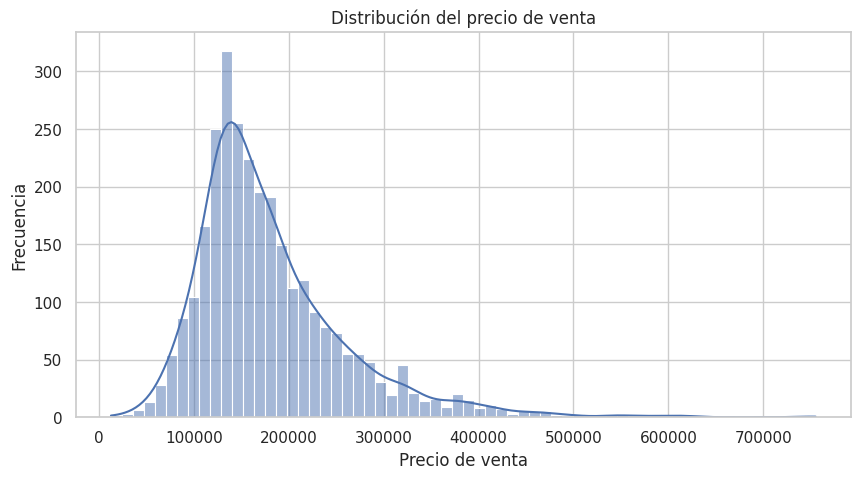

In [12]:

# Histograma de precios
plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución del precio de venta')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.show()


In [13]:

# Relación entre superficie y precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=df)
plt.title('Superficie habitable vs Precio de venta (color según calidad)')
plt.show()


ValueError: Could not interpret value `GrLivArea` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

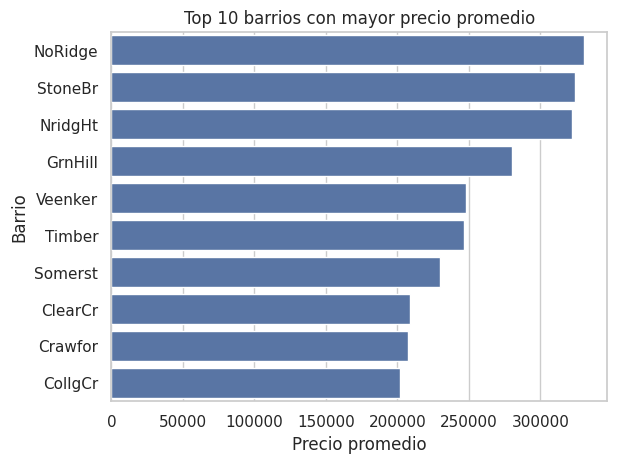

In [14]:

# Precio promedio por barrio (top 10)
top_neigh = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_neigh.values, y=top_neigh.index)
plt.title('Top 10 barrios con mayor precio promedio')
plt.xlabel('Precio promedio')
plt.ylabel('Barrio')
plt.show()


In [15]:

# Distribución del precio por calidad general
plt.figure(figsize=(10, 5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Precio de venta según calidad general')
plt.show()


ValueError: Could not interpret value `OverallQual` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>